In [8]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

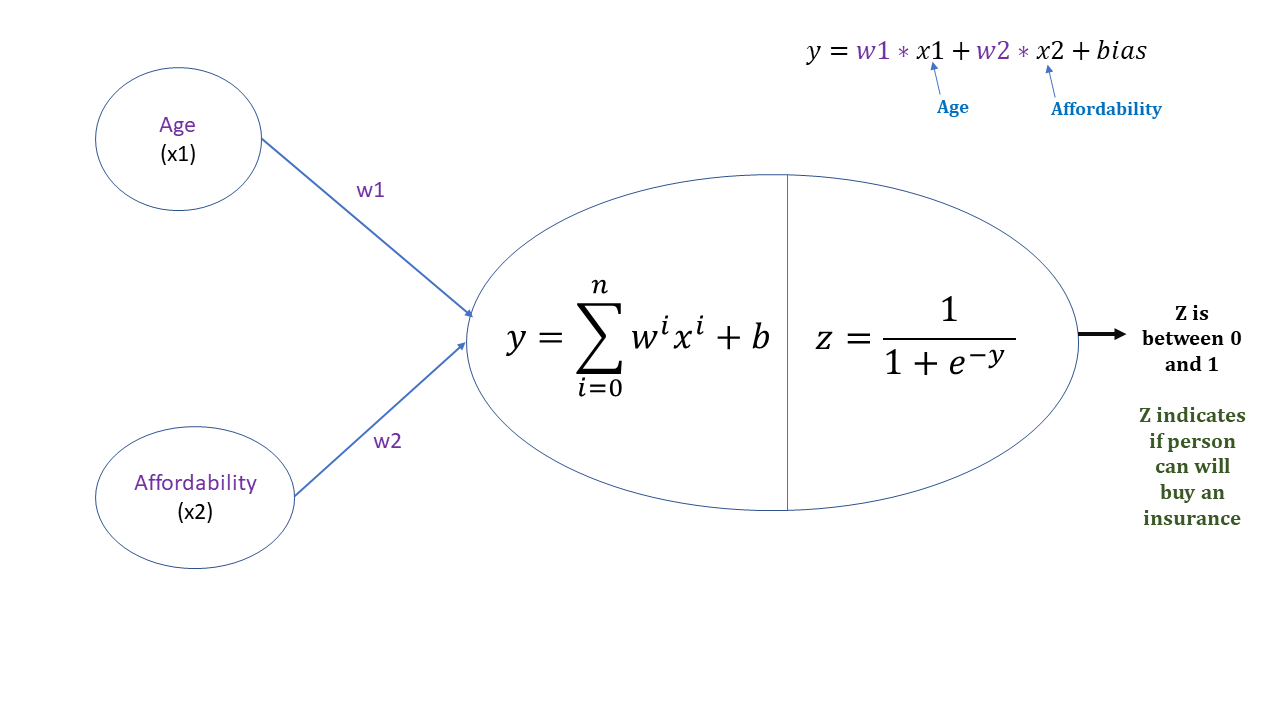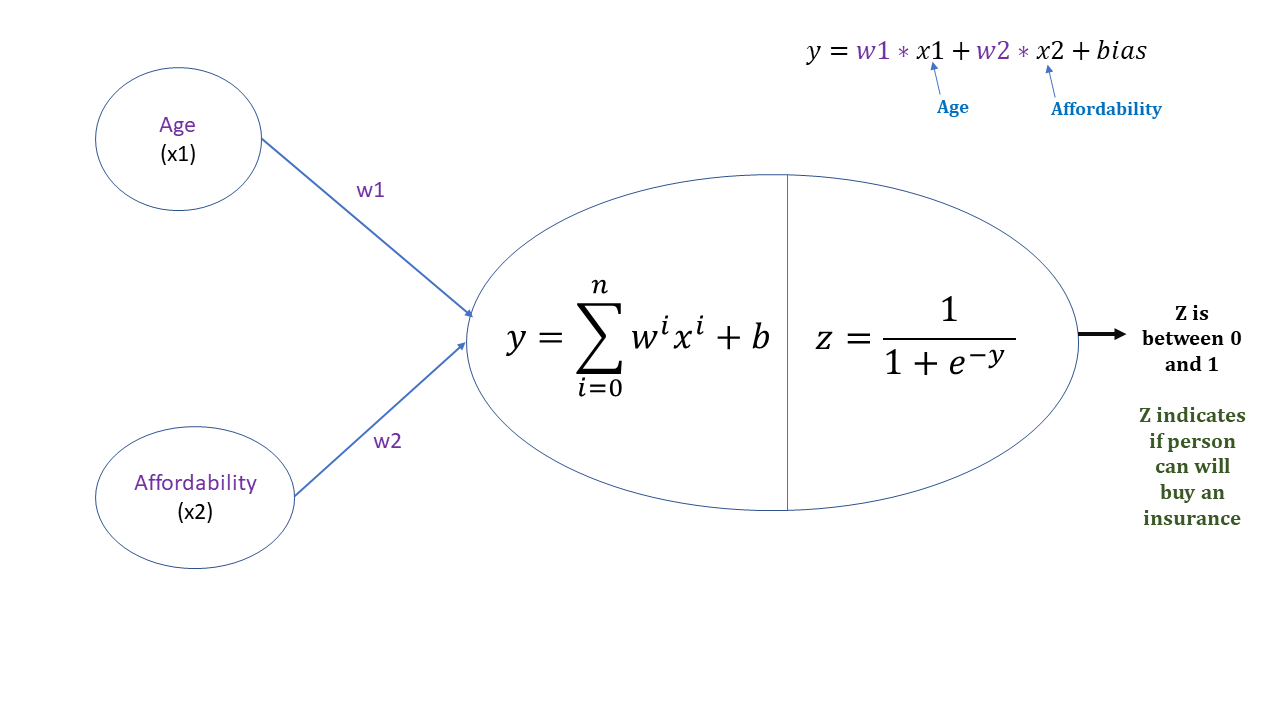

In [9]:
df = pd.read_csv("insurance_data (1).csv")
df.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age','affordibility']],df.bought_insurance,test_size=0.2, random_state=25)

In [11]:
X_train_scaled = X_train.copy()
X_train_scaled['age'] = X_train_scaled['age'] / 100

X_test_scaled = X_test.copy()
X_test_scaled['age'] = X_test_scaled['age'] / 100

In [12]:
model = keras.Sequential([  
    keras.layers.Dense(1, input_shape = (2,), activation='sigmoid', kernel_initializer='ones', bias_initializer='zeros') #1 layer
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs= 10)

Epoch 1/10
1/1 [==============================] - 0s 479ms/step - loss: 0.7113 - accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 0s 5ms/step - loss: 0.7110 - accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 0s 4ms/step - loss: 0.7106 - accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - 0s 5ms/step - loss: 0.7102 - accuracy: 0.5000
Epoch 5/10
1/1 [==============================] - 0s 5ms/step - loss: 0.7098 - accuracy: 0.5000
Epoch 6/10
1/1 [==============================] - 0s 5ms/step - loss: 0.7094 - accuracy: 0.5000
Epoch 7/10
1/1 [==============================] - 0s 5ms/step - loss: 0.7091 - accuracy: 0.5000
Epoch 8/10
1/1 [==============================] - 0s 5ms/step - loss: 0.7087 - accuracy: 0.5000
Epoch 9/10
1/1 [==============================] - 0s 5ms/step - loss: 0.7083 - accuracy: 0.5000
Epoch 10/10
1/1 [==============================] - 0s 5ms/step - loss: 0.7079 - accuracy: 0.5000


In [13]:
model.evaluate(X_test_scaled,y_test)

1/1 [==============================] - 0s 112ms/step - loss: 0.7282 - accuracy: 0.5000


[0.7282423973083496, 0.5]

In [14]:
model.predict(X_test_scaled)

1/1 [==============================] - 0s 54ms/step


array([[0.8092768 ],
       [0.76100826],
       [0.5615384 ],
       [0.7785465 ],
       [0.8123142 ],
       [0.8297589 ]], dtype=float32)

In [15]:
y_test

2     1
10    0
21    0
11    0
14    1
9     1
Name: bought_insurance, dtype: int64

In [15]:
coef, intercept = model.get_weights()

# WITHOUT USING TESNOR FLOW

In [17]:
def sigmoid(x):
        import math
        return 1 / (1 + math.exp(-x))
sigmoid(18)

0.9999999847700205

In [18]:
def prediction_function(age, affordibility):
    weighted_sum = coef[0]*age + coef[1]*affordibility + intercept
    return sigmoid(weighted_sum)

prediction_function(.47, 1) #returns y_predicted

C:\Users\jlhb83\AppData\Local\Temp\ipykernel_13332\396317115.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1 / (1 + math.exp(-x))


0.8092768210754775

In [19]:
def log_loss(y_true, y_predicted):
    epsilon = 1e-15
    y_predicted_new = [max(i,epsilon) for i in y_predicted]
    y_predicted_new = [min(i,1-epsilon) for i in y_predicted_new]
    y_predicted_new = np.array(y_predicted_new)
    return -np.mean(y_true*np.log(y_predicted_new)+(1-y_true)*np.log(1-y_predicted_new))

In [20]:
def sigmoid_numpy(X): #array input, better use of computation 
   return 1/(1+np.exp(-X))


In [21]:
def gradient_descent(age, affordability, y_true, epochs, loss_thresold):
    w1 = w2 = 1
    bias = 0
    rate = 0.5
    n = len(age)
    for i in range(epochs):
        weighted_sum = w1 * age + w2 * affordability + bias
        y_predicted = sigmoid_numpy(weighted_sum)
        loss = log_loss(y_true, y_predicted)

        w1d = (1/n)*np.dot(np.transpose(age),(y_predicted-y_true)) 
        w2d = (1/n)*np.dot(np.transpose(affordability),(y_predicted-y_true)) 

        bias_d = np.mean(y_predicted-y_true)
        w1 = w1 - rate * w1d
        w2 = w2 - rate * w2d
        bias = bias - rate * bias_d

        print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')

        if loss<=loss_thresold:
            break

    return w1, w2, bias

In [28]:
class myNN:
    def __init__(self):
        self.w1 = 1 
        self.w2 = 1
        self.bias = 0
        
    def fit(self, X, y, epochs, loss_thresold):
        self.w1, self.w2, self.bias = self.gradient_descent(X['age'],X['affordibility'],y, epochs, loss_thresold)
        print(f"Final weights and bias: w1: {self.w1}, w2: {self.w2}, bias: {self.bias}")
        
    def predict(self, X_test):
        weighted_sum = self.w1*X_test['age'] + self.w2*X_test['affordibility'] + self.bias
        return sigmoid_numpy(weighted_sum)

    def gradient_descent(self, age,affordability, y_true, epochs, loss_thresold):
        w1 = w2 = 1
        bias = 0
        rate = 0.5
        n = len(age)
        for i in range(epochs):
            weighted_sum = w1 * age + w2 * affordability + bias
            y_predicted = sigmoid_numpy(weighted_sum)
            loss = log_loss(y_true, y_predicted)
            
            w1d = (1/n)*np.dot(np.transpose(age),(y_predicted-y_true)) 
            w2d = (1/n)*np.dot(np.transpose(affordability),(y_predicted-y_true)) 

            bias_d = np.mean(y_predicted-y_true)
            w1 = w1 - rate * w1d
            w2 = w2 - rate * w2d
            bias = bias - rate * bias_d
            
            if i%50==0:
                print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')
            
            if loss<=loss_thresold:
                print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')
                break

        return w1, w2, bias

In [29]:
customModel = myNN()
customModel.fit(X_train_scaled, y_train, epochs=8000, loss_thresold=0.2)

Epoch:0, w1:0.974907633470177, w2:0.948348125394529, bias:-0.11341867736368583, loss:0.7113403233723417
Epoch:50, w1:1.503319554173139, w2:1.108384790367645, bias:-1.2319047301235464, loss:0.5675865113475955
Epoch:100, w1:2.200713131760032, w2:1.2941584023238903, bias:-1.6607009122062801, loss:0.5390680417774752
Epoch:150, w1:2.8495727769689085, w2:1.3696895491572745, bias:-1.986105845859897, loss:0.5176462164249294
Epoch:200, w1:3.443016970881803, w2:1.4042218624465033, bias:-2.2571369883752723, loss:0.5005011269691375
Epoch:250, w1:3.982450494649576, w2:1.4239127329321233, bias:-2.494377365971801, loss:0.48654089537617085
Epoch:300, w1:4.472179522095915, w2:1.438787986553552, bias:-2.707387811922373, loss:0.4750814640632793
Epoch:350, w1:4.917245868007634, w2:1.4525660781176122, bias:-2.901176333556766, loss:0.46561475306999006
Epoch:400, w1:5.3225621674147305, w2:1.4664810071905663, bias:-3.0787595797907787, loss:0.4577474350773423
Epoch:450, w1:5.69260053360137, w2:1.48081124681066